In [1]:
from mp_api.client import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
import numpy as np
import matplotlib.pyplot as plt

mp_key = "ER5V8i0JUw7k31Nk5IpkvogP61BDz9cw"
mp_id = "mp-441"

with MPRester(mp_key) as m:
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)


Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

### Structure des bandes de phonons et zone de brillouin

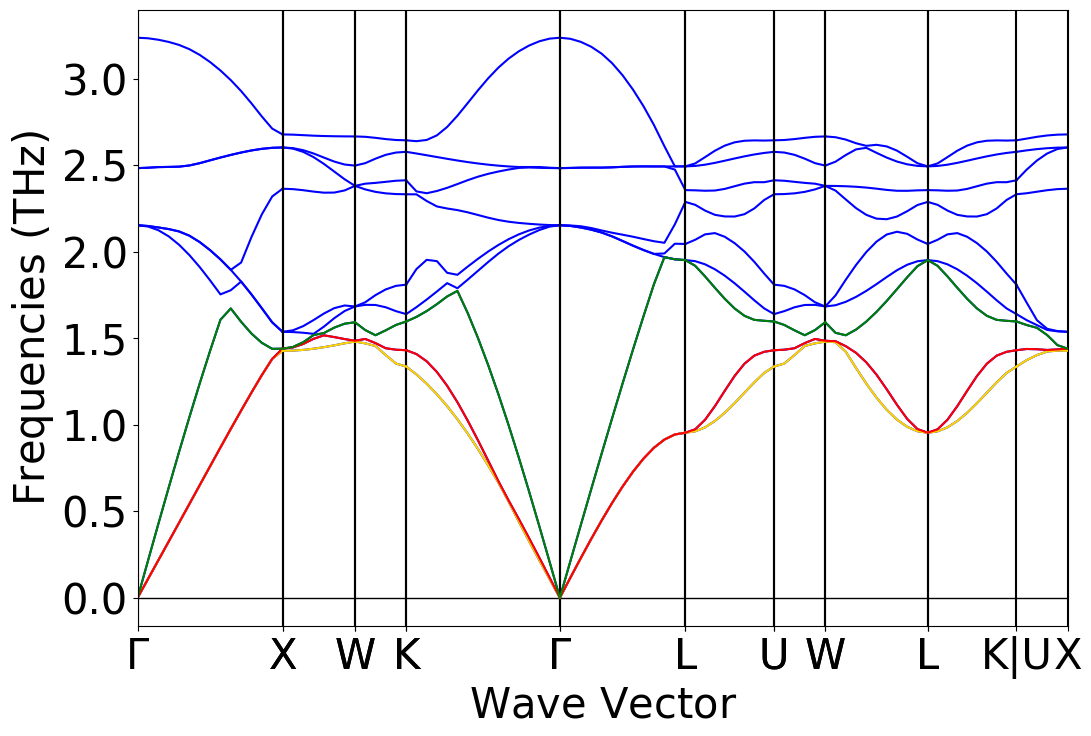

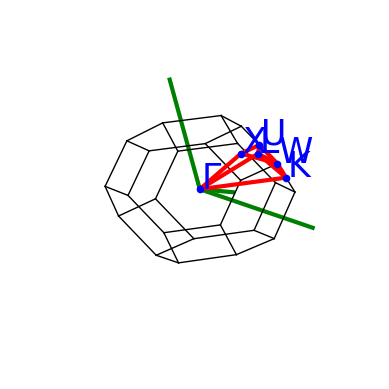

In [2]:
ph_bandstructure = PhononBSPlotter(ph_bs)
data_ph = ph_bandstructure.bs_plot_data()
distances = data_ph['distances']
frequency = data_ph['frequency']

ph_bandstructure_plot = ph_bandstructure.get_plot()
for i in range(len(distances)):
    plt.plot(distances[i], frequency[i][0], color = 'gold')
    plt.plot(distances[i], frequency[i][1], color = 'red')
    plt.plot(distances[i], frequency[i][2], color = 'green')

ph_bandstructure.plot_brillouin()

### Vitesse du son

In [4]:
A = 10**10

print ('Γ - X:')
cas_1 = 2*np.pi*np.abs((frequency[0][1][1]-frequency[0][1][0])*(10**12))
cas_1 = cas_1/((distances[0][1]-distances[0][0])*A)
print('La vitesse de propagation du son pour la première bande acoustique dans le cas Γ - X vaut {} m/s'.format(cas_1))

print ('K - Γ:')
cas_2 = 2*np.pi*np.abs((frequency[3][0][-1]-frequency[3][0][-2])*(10**12))
cas_2 = cas_2/((distances[3][-1]-distances[3][-2])*A)
print('La vitesse de propagation du son pour la seconde bande acoustique dans le cas K - Γ vaut {} m/s'.format(cas_2))

print ('Γ - L:')
cas_3 = 2*np.pi*np.abs((frequency[4][2][1]-frequency[4][2][0])*(10**12))
cas_3 = cas_3/((distances[4][1]-distances[4][0])*A)
print('La vitesse de propagation du son pour la troisième bande acoustique dans le cas Γ - L vaut {} m/s'.format(cas_3))



Γ - X:
La vitesse de propagation du son pour la première bande acoustique dans le cas Γ - X vaut 1279.1145046218428 m/s
K - Γ:
La vitesse de propagation du son pour la seconde bande acoustique dans le cas K - Γ vaut 1281.6764494198578 m/s
Γ - L:
La vitesse de propagation du son pour la troisième bande acoustique dans le cas Γ - L vaut 2453.651889725436 m/s
